In [ ]:
import pandas as pd

# Chargement des données
df = pd.read_csv("../data/rte_consommation_electrique_30min_fr.csv", sep=';')

# Aperçu brut
df.head()


In [ ]:
# Afficher les colonnes et leur type
df.info()

# Statistiques générales
#df.describe()

# Vérifier les valeurs manquantes
df.isna().sum()


In [53]:
# 1. Conversion sûre
df['date_heure'] = pd.to_datetime(df['Date - Heure'], errors='coerce')

# 3. Mettre en index
df = df.set_index('date_heure')


In [ ]:
df["date_heure"].iloc[0].tzinfo

df['date_heure'] = df['date_heure'].apply(lambda x: x.replace(tzinfo=None) if x.tzinfo else x)

df["date_heure"].iloc[0]

df = df.set_index('date_heure')



In [28]:
df = df.sort_index()


In [29]:
print(type(df.index)) 

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
# Visualisation rapide du taux de NaN
import matplotlib.pyplot as plt

df[['Consommation brute électricité (MW) - RTE', 'Consommation brute gaz (MW PCS 0°C) - Teréga' , 'Consommation brute gaz (MW PCS 0°C) - GRTgaz']].isna().mean().plot.bar()
plt.title("Proportion de valeurs manquantes")
plt.ylabel("Taux de NaN")
plt.show()


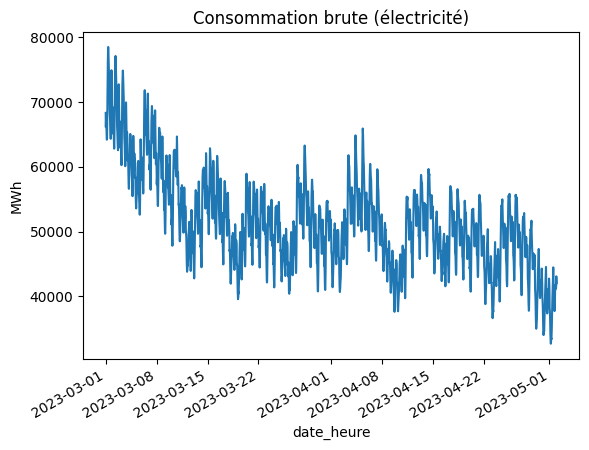

In [43]:
import matplotlib.pyplot as plt

df.loc['2023-03-01':'2023-05-01']['Consommation brute électricité (MW) - RTE'].plot()
plt.title("Consommation brute (électricité)")
plt.ylabel("MWh")
plt.show()


<AxesSubplot:title={'center':'Conso moyenne par jour'}, xlabel='dayofweek'>

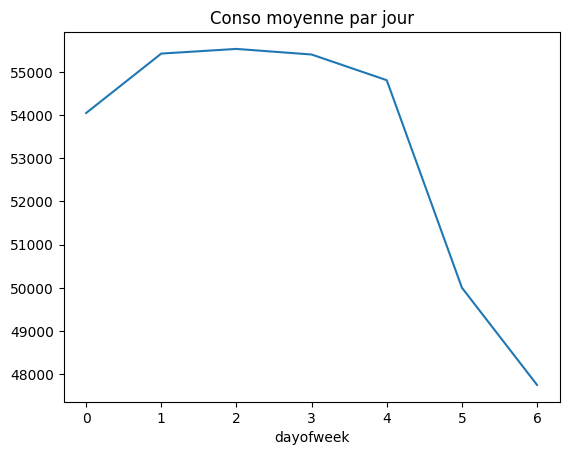

In [48]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month

#df.groupby('hour')['Consommation brute électricité (MW) - RTE'].mean().plot(title='Conso moyenne par heure')

df.groupby('dayofweek')['Consommation brute électricité (MW) - RTE'].mean().plot(title='Conso moyenne par jour')

#df.groupby('month')['Consommation brute électricité (MW) - RTE'].mean().plot(title='Conso moyenne par mois')


<AxesSubplot:title={'center':'Conso moyenne par an'}, xlabel='date_heure'>

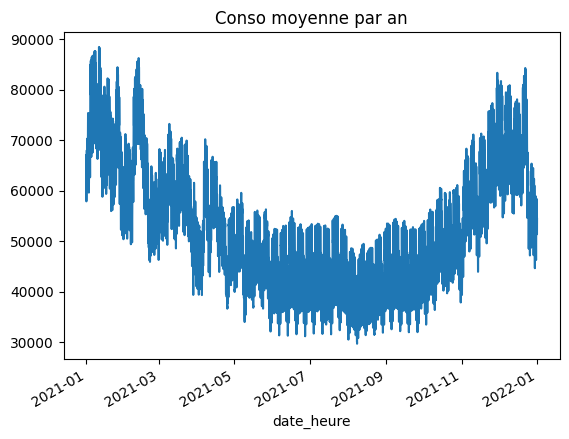

In [51]:
df['year'] = df.index.year

df.loc["2021"]['Consommation brute électricité (MW) - RTE'].plot(title='Conso moyenne par an')
